## Import Libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow.keras import layers, models, datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras import datasets, layers, models, losses, Model
from tensorflow.keras.datasets import mnist

## Preprocessing Data

###Reshaping data 

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

x_train = tf.pad(x_train, [[0, 0], [2,2], [2,2]])/255
x_test = tf.pad(x_test, [[0, 0], [2,2], [2,2]])/255
x_train = tf.expand_dims(x_train, axis=3, name=None)
x_test = tf.expand_dims(x_test, axis=3, name=None)
x_train = tf.repeat(x_train, 3, axis=3)
x_test = tf.repeat(x_test, 3, axis=3)
x_val = x_train[-2000:,:,:,:]
y_val = y_train[-2000:]
x_train = x_train[:-2000,:,:,:]
y_train = y_train[:-2000]

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)
print(x_test.shape)

(58000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
np.set_printoptions(linewidth=300)
print(np.array(x_test[0]))

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


## Modelling

In [ ]:
model = tf.keras.applications.ResNet50(
                        include_top = False, 
                        input_shape = (32, 32, 3), 
                        weights = 'imagenet')

for layer in model.layers:
  layer.trainable = False

x = layers.Flatten()(model.output)
x = layers.Dense(1000, activation='relu')(x)
predictions = layers.Dense(10, activation = 'softmax')(x)

head_model = Model(inputs = model.input, outputs = predictions)
head_model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
head_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                                                                                              

## Model Compiling and fit

In [ ]:
model.compile(optimizer='Adam', 
               metrics =['accuracy'],
               loss = 'categorical_crossentropy')

In [ ]:
history = head_model.fit(x_train, y_train,
          batch_size = 64, 
          epochs = 10, validation_data = (x_val , y_val))

Epoch 1/10
907/907 [==============================] - 30s 18ms/step - loss: 0.6017 - accuracy: 0.8102 - val_loss: 0.3452 - val_accuracy: 0.8825
Epoch 2/10
907/907 [==============================] - 15s 17ms/step - loss: 0.3434 - accuracy: 0.8883 - val_loss: 0.2134 - val_accuracy: 0.9385
Epoch 3/10
907/907 [==============================] - 15s 17ms/step - loss: 0.2991 - accuracy: 0.9023 - val_loss: 0.4296 - val_accuracy: 0.8620
Epoch 4/10
907/907 [==============================] - 15s 17ms/step - loss: 0.2730 - accuracy: 0.9119 - val_loss: 0.1918 - val_accuracy: 0.9495
Epoch 5/10
907/907 [==============================] - 16s 18ms/step - loss: 0.2537 - accuracy: 0.9186 - val_loss: 0.2343 - val_accuracy: 0.9290
Epoch 6/10
907/907 [==============================] - 16s 18ms/step - loss: 0.2396 - accuracy: 0.9214 - val_loss: 0.1567 - val_accuracy: 0.9540
Epoch 7/10
907/907 [==============================] - 16s 17ms/step - loss: 0.2306 - accuracy: 0.9231 - val_loss: 0.1632 - val_accuracy:

## Model Evaluation

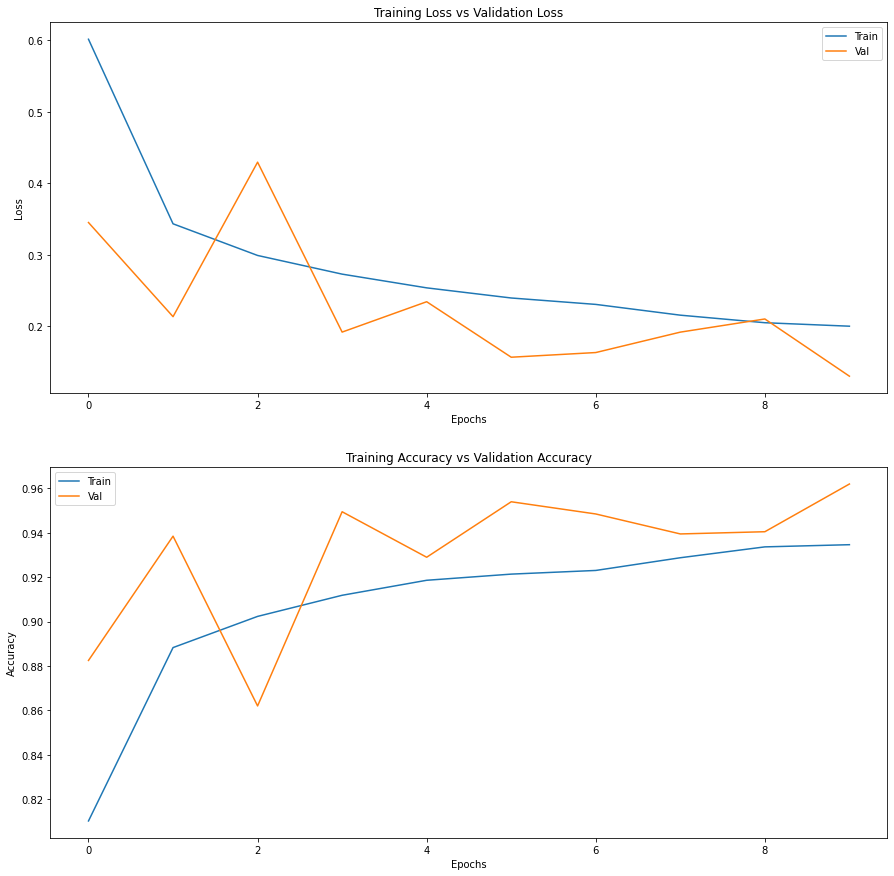

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))

axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend(['Train','Val'])

axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(['Train', 'Val'])

In [ ]:
eval = head_model.evaluate(x_test, y_test)
eval

313/313 [==============================] - 5s 14ms/step - loss: 0.1849 - accuracy: 0.9389


[0.18490205705165863, 0.9388999938964844]

## Classification

In [ ]:
predict = head_model.predict(x_test)
result = np.argmax(predict, axis = 1)

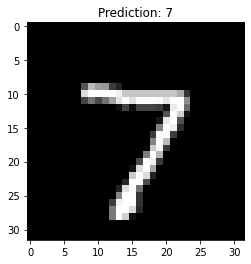

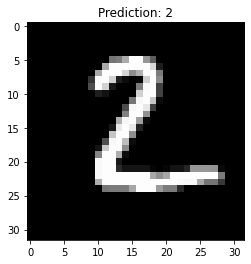

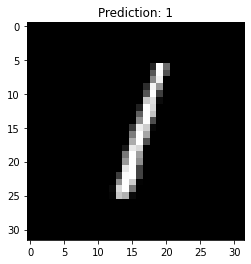

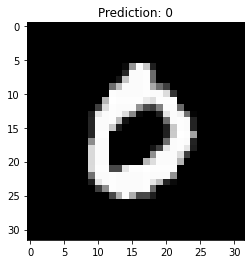

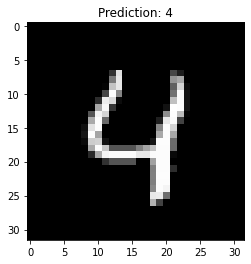

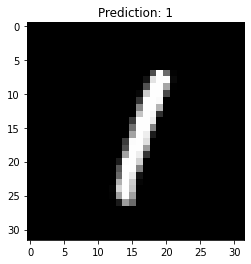

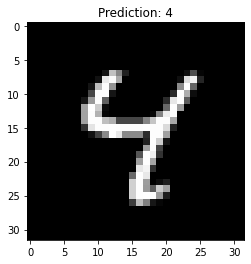

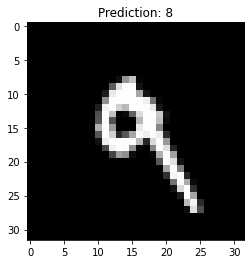

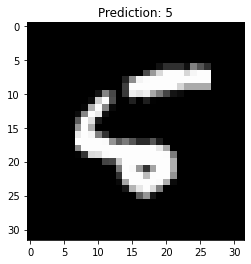

In [ ]:
for sample in range(9):

  fig = plt.figure()
  plt.imshow(x_test[sample], cmap='gray', interpolation='none')
  plt.title(f'Prediction: {result[sample]}')
  plt.show()